In [1]:
# Importation des bibliothèques nécessaires
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

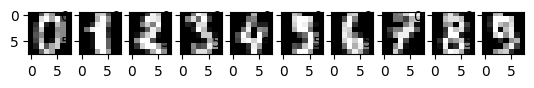

In [3]:
# Chargement de la base de données digits (ensemble de chiffres manuscrits)
digits = load_digits()
X, y = digits.data, digits.target

# Affichage des premières images pour une compréhension visuelle des données
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1, 10, i + 1)
    plt.imshow(digit, cmap='gray')
plt.show()

In [4]:
# Création et évaluation d'un classifieur de base (arbre de décision)
clf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf.fit(X_train, y_train)
# Évaluation de la précision pour comprendre les performances de base
print("Accuracy de l'arbre de décision :", clf.score(X_test, y_test))

Accuracy de l'arbre de décision : 0.7255871446229913


In [5]:
# Application du Bagging avec des arbres de décision
# Cette méthode vise à réduire la variance et à améliorer la robustesse du modèle
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
bagging_clf.fit(X_train, y_train)
# Évaluation de la précision pour voir l'effet du Bagging sur les performances
print("Accuracy du Bagging :", bagging_clf.score(X_test, y_test))

Accuracy du Bagging : 0.9283065512978986


In [6]:
# Utilisation de Random Forest
# Random Forest est une extension du Bagging avec une randomisation supplémentaire dans la sélection des caractéristiques
rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)
# Analyse de la précision pour évaluer les performances de la Random Forest
print("Accuracy de la Random Forest :", rf_clf.score(X_test, y_test))

Accuracy de la Random Forest : 0.9406674907292955


In [7]:
# Mise en œuvre de AdaBoost
# AdaBoost est une méthode de boosting qui ajuste les poids des observations mal classées à chaque itération
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=1)
ada_clf.fit(X_train, y_train)
# Évaluation de la précision pour mesurer l'efficacité d'AdaBoost sur cet ensemble de données
print("Accuracy de AdaBoost :", ada_clf.score(X_test, y_test))

c:\Users\yzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy de AdaBoost : 0.9338689740420272


In [8]:
# Analyse pour l'arbre de décision
y_pred = clf.predict(X_test)
print("Arbre de décision - Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("Arbre de décision - Rapport de classification :")
print(classification_report(y_test, y_pred))

Arbre de décision - Matrice de confusion :
[[130   2   0   0  10   0   8   4   3   3]
 [  1 127   4   4   3   5   2   2   4  11]
 [  6   6 132   0   0   0   1   2  11   3]
 [  4   4   3 114   1   7   1   6  14  16]
 [  5   2   0   0 119  13   5  14   4   2]
 [  0   4   0   0  11 122  18   9   1   2]
 [  4   4   1   0   3   8 122   0  14   0]
 [  2   2   2   0  12  13   0 125   0   3]
 [  1  15   8   1   5  12   7   5  93   8]
 [  1  19   0  16   2  13   1   4  17  90]]
Arbre de décision - Rapport de classification :
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       160
           1       0.69      0.78      0.73       163
           2       0.88      0.82      0.85       161
           3       0.84      0.67      0.75       170
           4       0.72      0.73      0.72       164
           5       0.63      0.73      0.68       167
           6       0.74      0.78      0.76       156
           7       0.73      0.79      0.76  

In [9]:
# Analyse pour le modèle Bagging
y_pred_bagging = bagging_clf.predict(X_test)
print("Bagging - Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_bagging))
print("Bagging - Rapport de classification :")
print(classification_report(y_test, y_pred_bagging))

Bagging - Matrice de confusion :
[[158   0   0   0   2   0   0   0   0   0]
 [  0 157   1   1   0   0   1   0   1   2]
 [  1   1 146   6   0   0   0   0   6   1]
 [  2   3   0 148   0   2   0   5   9   1]
 [  1   2   0   0 158   0   0   3   0   0]
 [  1   2   0   3   2 151   3   0   1   4]
 [  2   1   0   0   1   0 152   0   0   0]
 [  0   0   0   0   2   0   0 155   0   2]
 [  0   5   2   1   1   3   1   5 134   3]
 [  0   3   0   3   0   3   0   7   4 143]]
Bagging - Rapport de classification :
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       160
           1       0.90      0.96      0.93       163
           2       0.98      0.91      0.94       161
           3       0.91      0.87      0.89       170
           4       0.95      0.96      0.96       164
           5       0.95      0.90      0.93       167
           6       0.97      0.97      0.97       156
           7       0.89      0.97      0.93       159
           

In [10]:
# Analyse pour le modèle Random Forest
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest - Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_rf))
print("Random Forest - Rapport de classification :")
print(classification_report(y_test, y_pred_rf))

Random Forest - Matrice de confusion :
[[157   0   0   0   3   0   0   0   0   0]
 [  0 160   0   1   0   1   0   0   0   1]
 [  1   0 151   5   0   0   0   0   2   2]
 [  0   2   0 149   0   2   0   6   9   2]
 [  0   1   0   0 162   0   0   1   0   0]
 [  0   2   0   2   1 150   2   0   1   9]
 [  2   0   0   0   0   0 154   0   0   0]
 [  0   1   0   0   1   0   0 156   0   1]
 [  0   3   1   2   1   2   0   3 141   2]
 [  0   2   0   6   2   2   0   6   3 142]]
Random Forest - Rapport de classification :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       160
           1       0.94      0.98      0.96       163
           2       0.99      0.94      0.96       161
           3       0.90      0.88      0.89       170
           4       0.95      0.99      0.97       164
           5       0.96      0.90      0.93       167
           6       0.99      0.99      0.99       156
           7       0.91      0.98      0.94       159

In [11]:
# Analyse pour le modèle AdaBoost
y_pred_ada = ada_clf.predict(X_test)
print("AdaBoost - Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_ada))
print("AdaBoost - Rapport de classification :")
print(classification_report(y_test, y_pred_ada))

AdaBoost - Matrice de confusion :
[[158   0   0   0   1   0   1   0   0   0]
 [  0 159   0   1   0   0   1   0   0   2]
 [  1   0 147   1   0   0   0   0   7   5]
 [  0   2   0 144   0   2   0   4  14   4]
 [  0   4   0   0 158   0   0   2   0   0]
 [  0   2   0   2   1 148   5   0   2   7]
 [  1   1   0   0   0   0 153   0   1   0]
 [  0   0   0   0   1   0   0 153   1   4]
 [  0   3   1   0   0   3   0   0 146   2]
 [  0   0   0   7   1   3   0   5   2 145]]
AdaBoost - Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       160
           1       0.93      0.98      0.95       163
           2       0.99      0.91      0.95       161
           3       0.93      0.85      0.89       170
           4       0.98      0.96      0.97       164
           5       0.95      0.89      0.92       167
           6       0.96      0.98      0.97       156
           7       0.93      0.96      0.95       159
         